## HTTP response code (크롤링할 페이지가 없는 경우 확인방법)

In [13]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://davelee-fun.github.io/xxx')

if res.status_code != 200:
    print('페이지 없음')
else:
    soup = BeautifulSoup(res.content, 'html.parser')
    data = soup.select('h4.card-text')
    for item in data:
        print(item.get_text().strip())

페이지 없음


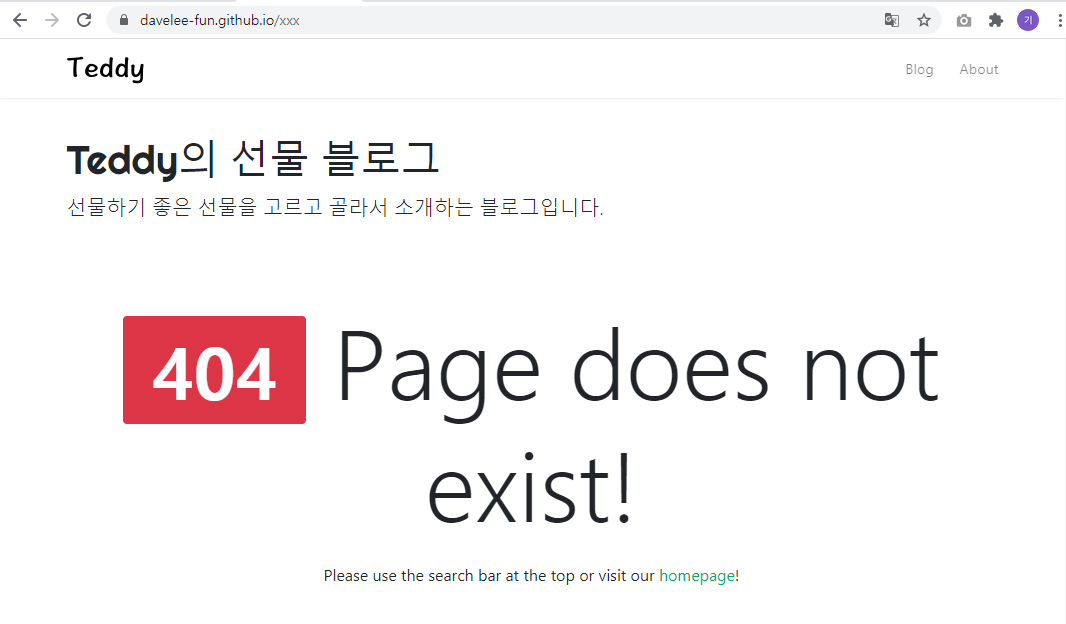

## 여러페이지 한번에 크롤링하는 기법

In [15]:
import requests
from bs4 import BeautifulSoup


for page_num in range(10):
    print('\n page_num: ',page_num + 1, '\n')
    if page_num ==0:
        res = requests.get('https://davelee-fun.github.io/')
    else:
        res = requests.get('https://davelee-fun.github.io/page' + str(page_num + 1))
    soup = BeautifulSoup(res.content, 'html.parser')
    
    data = soup.select('h4.card-text')
    
    for index, item in enumerate(data):
        print(str(index + 1) + '.',item.get_text().strip())


 page_num:  1 

1. 상품명: 보몽드 순면스퀘어 솔리드 누빔매트커버, 다크블루
2. 상품명: 슈에뜨룸 선인장 리플 침구 세트, 베이지
3. 상품명: 선우랜드 레인보우 2단 문걸이용 옷걸이 _중형, 화이트, 상세페이지참조
4. 상품명: 보드래 헬로우 누빔 매트리스커버, 핑크
5. 상품명: 보드래 퍼펙트 누빔 매트리스커버, 차콜
6. 상품명: 피아블 클래식 방수 매트리스커버, 화이트
7. 상품명: 더자리 에코항균 마이크로 매트리스커버, 밀키차콜그레이
8. 상품명: 더자리 프레쉬 퓨어 매트리스 커버, 퓨어 차콜그레이
9. 상품명: 몽쉐어 알러스킨 항균 매트리스 커버, 카키그레이
10. 상품명: 쿠팡 브랜드 - 코멧 홈 40수 트윌 순면 100% 홑겹 매트리스커버, 그레이
11. 상품명: 패브릭아트 항균 마이크로 원단 매트리스 커버, 아이보리
12. 상품명: 바숨 순면 누빔 침대 매트리스커버, 차콜
13. 상품명: WEMAX 다용도 문옷걸이, 화이트, 1개
14. 상품명: 타카타카 프리미엄 나노 화이바 누빔 매트리스 커버, 젠틀핑핑
15. 상품명: 보몽드 순면스퀘어 누빔매트커버, 다크그레이
16. 상품명: 보드래 국내산 순면 60수 누빔 매트리스커버, 그레이

 page_num:  2 

1. 상품명: 보드래 퍼펙트 누빔 매트리스커버, 베이지핑크
2. 상품명: 쿠팡 브랜드 - 코멧 홈 40수 순면 누빔 매트리스커버, 챠콜
3. 상품명: 바숨 순면 누빔 침대 매트리스커버, 화이트
4. 상품명: 프랑떼 항균 방수 매트리스커버, 화이트
5. 상품명: 보몽드 순면스퀘어 솔리드 누빔매트커버, 다크블루
6. 상품명: 네이쳐리빙 피아블 클래식 방수 매트리스커버, 그레이
7. 상품명: 쿠팡 브랜드 - 코멧 홈 순면 매트리스커버, 베이지
8. 상품명: 타카타카 프리미엄 나노 화이바 누빔 매트리스 커버, 프렌치불독
9. 상품명: 더자리 에코항균 마이크로 매트리스커버, 밀키그레이
10. 상품명: 보몽드 순면스퀘어 누빔매트커버, 화이트
11. 상품명: 피아블 클래식 방수 매

## 크롤링해서 엑셀파일로 데이터 저장

In [16]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ad\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [17]:
import openpyxl

def write_excel_template(filename, sheetname, listdata):
    excel_file = openpyxl.Workbook()
    excel_sheet = excel_file.active
    excel_sheet.column_dimensions['A'].width = 100
    excel_sheet.column_dimensions['B'].width = 20
    
    if sheetname !='':
        excel_sheet.title = sheetname
        
    for item in listdata:
        excel_sheet.append(item)
    excel_file.save(filename)
    excel_file.close()

In [22]:
import requests
from bs4 import BeautifulSoup

product_lists = list()

for page_num in range(10):
    if page_num ==0:
        res = requests.get('https://davelee-fun.github.io/')
    else:
        res = requests.get('https://davelee-fun.github.io/page' + str(page_num + 1))
    soup = BeautifulSoup(res.content, 'html.parser')
    data = soup.select('div.card')
    
    for item in data:
        product_name = item.select_one('div.card-body h4.card-text')
        product_date = item.select_one('div.wrapfooter span.post-date')
        product_info = [product_name.get_text().strip(),product_date.get_text()]
        product_lists.append(product_info)

### 함수 실행 = 엑셀 파일 저장

In [23]:
write_excel_template('tmp.xlsx','상품정보', product_lists)

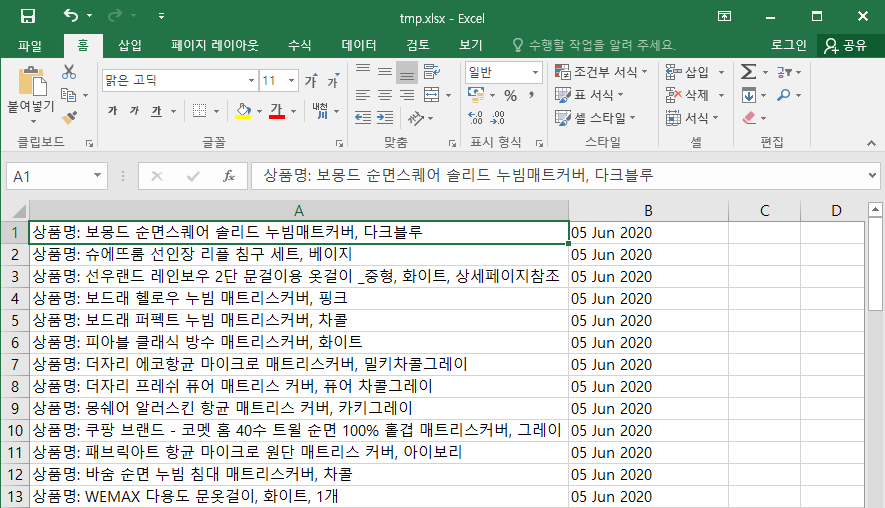